In [137]:
import numpy as np
import pandas as pd

# Import matplotlib, seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import random

In [138]:
from math import sqrt
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [158]:
df = pd.read_csv('drought2012-2023 (1).csv')

In [159]:
df.head()

,YEAR,MONTH,DAY,STID,TMAX,TMIN,TAVG,DMAX,DMIN,DAVG,...,S60NO,S60BD,TR05,R05BD,TR25,R25BD,TR60,R60BD,TR75,R75BD
0,2012,1,1,ACME,54.1600,31.7100,42.3500,30.3300,16.0500,24.3900,...,-999.0000,-999.0000,1.5364,0.0000,1.4526,0.0000,1.7743,0.0000,-999.0000,-999.0000
1,2012,1,1,ADAX,55.7800,34.4200,44.4800,32.5500,17.1200,24.9500,...,-999.0000,-999.0000,1.4050,0.0000,1.5394,0.0000,-996.0000,48.0000,-999.0000,-999.0000
2,2012,1,1,ALTU,53.1900,31.4900,41.3700,29.7500,13.4700,23.1000,...,-999.0000,-999.0000,-996.0000,48.0000,-996.0000,48.0000,-996.0000,48.0000,-999.0000,-999.0000
3,2012,1,1,ALVA,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,...,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000,-999.0000
4,2012,1,1,ALV2,50.5800,26.4100,38.5500,28.0500,18.6900,23.6900,...,-999.0000,-999.0000,1.4445,0.0000,1.4510,0.0000,-996.0000,48.0000,-999.0000,-999.0000


In [160]:
df.shape

(556987, 118)

In [161]:
df['datetime'] = pd.to_datetime(df[['YEAR', 'MONTH', 'DAY']])

In [162]:
df_okce = df[(df["STID"] == 'OKCE') & (df['RAIN']> -995)]

In [163]:
df_okce.shape

(3885, 119)

In [147]:
df_okce.set_index("datetime", inplace=True)

In [164]:
df_okce = df_okce.drop('STID', axis=1)

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [96]:
stat, p = stats.normaltest(df_okce.RAIN)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Data looks Gaussian (fail to reject H0)')
else:
    print('Data does not look Gaussian (reject H0)')

Statistics=4180.049, p=0.000
Data does not look Gaussian (reject H0)


Kurtosis of normal distribution: 39.75001950283436
Skewness of normal distribution: 5.503732656400663


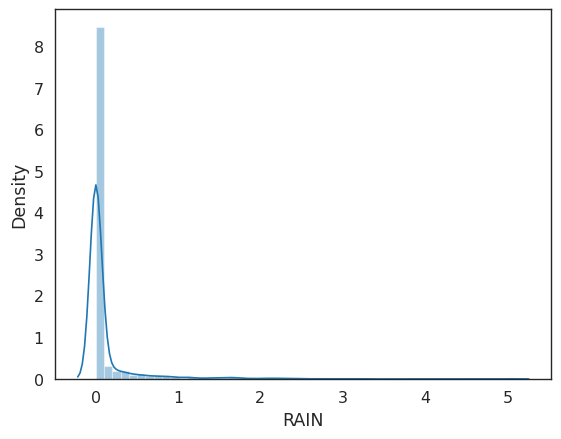

In [97]:
sns.distplot(df_okce.RAIN);
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(df_okce.RAIN)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(df_okce.RAIN)))

In [98]:
df_okce.head()

,YEAR,MONTH,DAY,TMAX,TMIN,TAVG,DMAX,DMIN,DAVG,HMAX,...,S60BD,TR05,R05BD,TR25,R25BD,TR60,R60BD,TR75,R75BD,datetime
93,2012,1,1,50.7400,36.0000,43.1100,31.1300,20.0300,25.7100,68.4200,...,-999.0000,2.1989,0.0000,1.9472,0.0000,1.7269,0.0000,-999.0000,-999.0000,2012-01-01
236,2012,1,2,44.0100,24.0600,34.5000,25.6100,6.9700,16.8400,79.6600,...,-999.0000,2.2615,0.0000,1.9817,0.0000,1.7346,0.0000,-999.0000,-999.0000,2012-01-02
379,2012,1,3,59.2500,24.6400,42.7100,27.7000,15.7700,21.3600,82.3000,...,-999.0000,2.3137,0.0000,2.0139,0.0000,1.7476,0.0000,-999.0000,-999.0000,2012-01-03
522,2012,1,4,58.7700,30.9300,44.8400,30.9400,23.8300,28.0400,83.1000,...,-999.0000,2.3675,0.0000,2.0433,0.0000,1.7589,0.0000,-999.0000,-999.0000,2012-01-04
665,2012,1,5,66.5200,28.1500,48.8500,32.1600,22.9400,27.7400,90.7000,...,-999.0000,2.4333,0.0000,2.0717,0.0000,1.7689,0.0000,-999.0000,-999.0000,2012-01-05


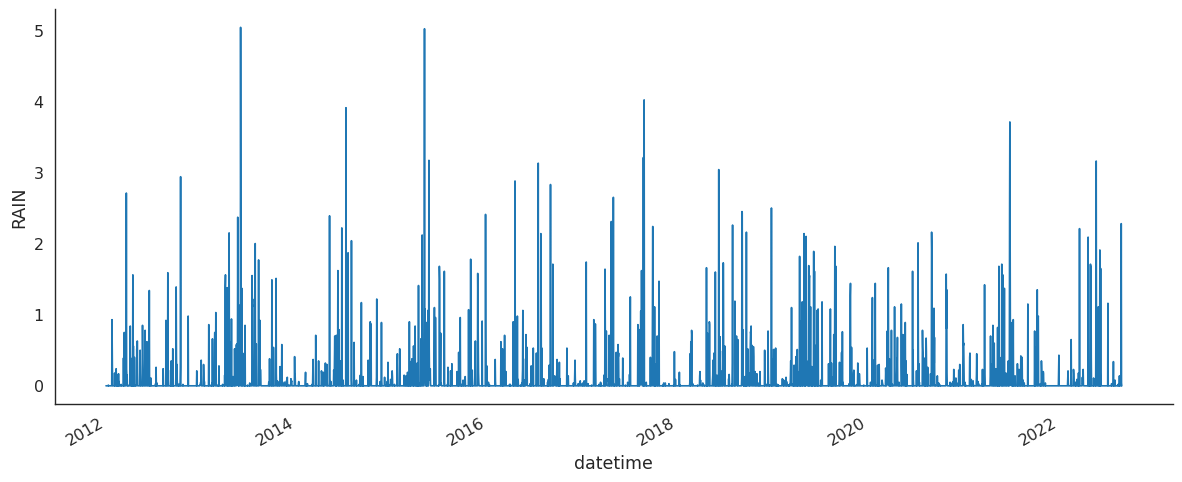

In [99]:
df1=df_okce.loc[:,['datetime','RAIN']]
df1.set_index('datetime',inplace=True)
df1.plot(figsize=(12,5))
plt.ylabel('RAIN')
plt.legend().set_visible(False)
plt.tight_layout()
sns.despine(top=True)
plt.show();

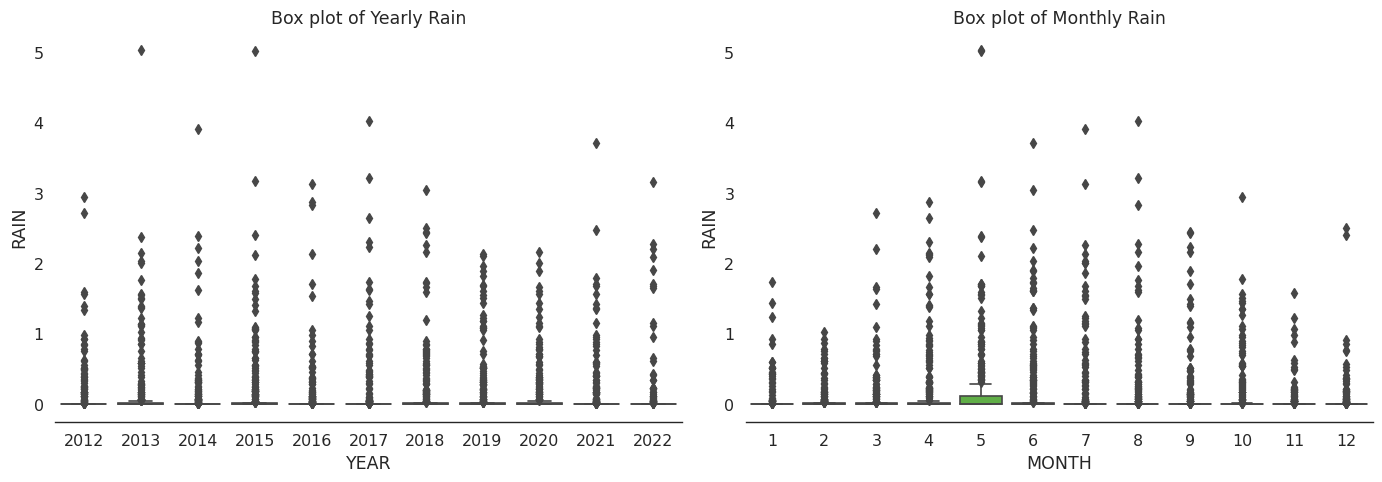

In [101]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x="YEAR", y="RAIN", data=df_okce)
plt.xlabel('YEAR')
plt.title('Box plot of Yearly Rain')
sns.despine(left=True)
plt.tight_layout()
plt.subplot(1,2,2)
sns.boxplot(x="MONTH", y="RAIN", data=df_okce)
plt.xlabel('MONTH')
plt.title('Box plot of Monthly Rain')
sns.despine(left=True)
plt.tight_layout();

In [102]:
dataset = df_okce.RAIN.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
     

In [103]:

model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Epoch 1/20
44/44 [==============================] - 5s 20ms/step - loss: 0.0058 - val_loss: 0.0052
Epoch 2/20
44/44 [==============================] - 0s 7ms/step - loss: 0.0057 - val_loss: 0.0051
Epoch 3/20
44/44 [==============================] - 0s 7ms/step - loss: 0.0056 - val_loss: 0.0051
Epoch 4/20
44/44 [==============================] - 0s 8ms/step - loss: 0.0056 - val_loss: 0.0051
Epoch 5/20
44/44 [==============================] - 0s 8ms/step - loss: 0.0056 - val_loss: 0.0051
Epoch 6/20
44/44 [==============================] - 0s 7ms/step - loss: 0.0056 - val_loss: 0.0051
Epoch 7/20
44/44 [==============================] - 0s 8ms/step - loss: 0.0056 - val_loss: 0.0051
Epoch 8/20
44/44 [==============================] - 0s 7ms/step - loss: 0.0056 - val_loss: 0.0051
Epoch 9/20
44/44 [==============================] - 0s 7ms/step - loss: 0.0056 - val_loss: 0.0051
Epoch 10/20
44/44 [==============================] - 0s 8ms/step - loss: 0.0056 - val_loss: 0.0051
Epoch 11/20
44/44 

In [104]:

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))
     

24/24 [==============================] - 0s 3ms/step
Train Mean Absolute Error: 0.18398624719254875
Train Root Mean Squared Error: 0.3736978374058838
Test Mean Absolute Error: 0.17648510240790163
Test Root Mean Squared Error: 0.36016223036111517


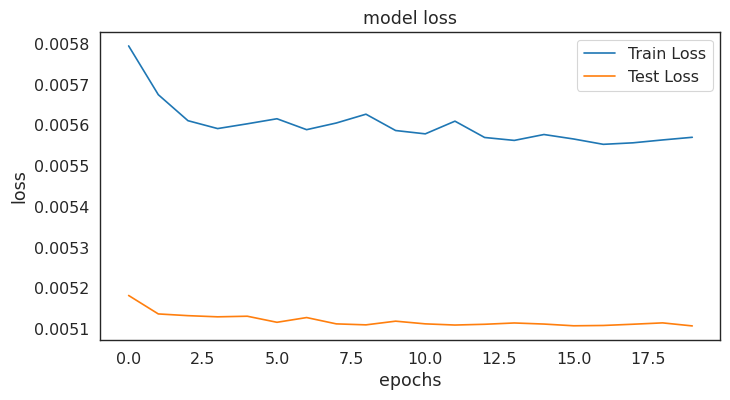

In [105]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

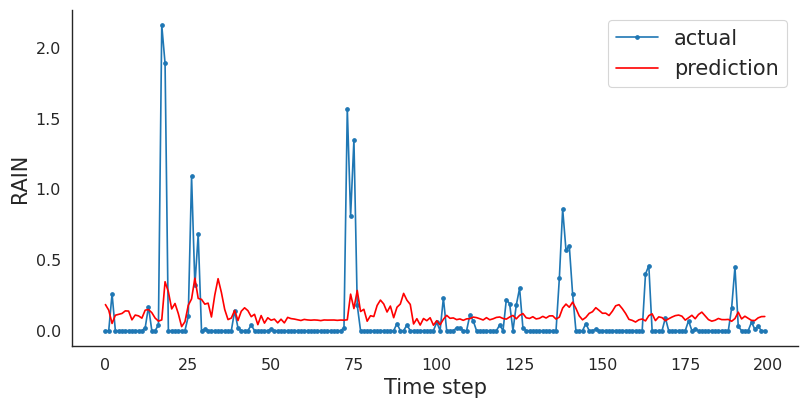

In [106]:

aa=[x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('RAIN', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

In [184]:
df_okce.head()

,YEAR,MONTH,DAY,TMAX,TMIN,TAVG,DMAX,DMIN,DAVG,HMAX,...,S60NO,S60BD,TR05,R05BD,TR25,R25BD,TR60,R60BD,TR75,R75BD
datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-01,2012,1,1,50.7400,36.0000,43.1100,31.1300,20.0300,25.7100,68.4200,...,-999.0000,-999.0000,2.1989,0.0000,1.9472,0.0000,1.7269,0.0000,-999.0000,-999.0000
2012-01-02,2012,1,2,44.0100,24.0600,34.5000,25.6100,6.9700,16.8400,79.6600,...,-999.0000,-999.0000,2.2615,0.0000,1.9817,0.0000,1.7346,0.0000,-999.0000,-999.0000
2012-01-03,2012,1,3,59.2500,24.6400,42.7100,27.7000,15.7700,21.3600,82.3000,...,-999.0000,-999.0000,2.3137,0.0000,2.0139,0.0000,1.7476,0.0000,-999.0000,-999.0000
2012-01-04,2012,1,4,58.7700,30.9300,44.8400,30.9400,23.8300,28.0400,83.1000,...,-999.0000,-999.0000,2.3675,0.0000,2.0433,0.0000,1.7589,0.0000,-999.0000,-999.0000
2012-01-05,2012,1,5,66.5200,28.1500,48.8500,32.1600,22.9400,27.7400,90.7000,...,-999.0000,-999.0000,2.4333,0.0000,2.0717,0.0000,1.7689,0.0000,-999.0000,-999.0000


In [186]:
monthly_rainfall

datetime
2012-01-31   1.3800
2012-02-29   0.9400
2012-03-31   4.4900
2012-04-30   5.1800
2012-05-31   3.4800
              ...  
2022-04-30   2.5600
2022-05-31   8.6800
2022-06-30   5.3400
2022-07-31   1.6500
2022-08-31   2.5700
Freq: M, Name: RAIN, Length: 128, dtype: float64

In [187]:
type(distribution)

NameError: ignored

In [199]:
import pandas as pd
import numpy as np
from scipy.stats import gamma
# Step 1: Calculate monthly total rainfall
monthly_rainfall = df_okce['RAIN'].resample('M').sum()
a = 1
# Step 2: Calculate long-term average monthly rainfall
long_term_avg = monthly_rainfall.mean()

# Step 3: Calculate SPI
def calculate_SPI(x, distribution):
    """
    Function to calculate the Standardized Precipitation Index (SPI)
    """
    x = np.asarray(x)
    params = distribution.fit(x)
    print(params)
    cdf = distribution.cdf(x, *params)
    inv_cdf = gamma.ppf(1, cdf)
    spi = (inv_cdf - np.mean(inv_cdf)) / np.std(inv_cdf)
    return spi

SPI = calculate_SPI(monthly_rainfall, gamma)


(1.0714221139266469, 0.09729948759867835, 3.027046508748529)


In [200]:
SPI

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [195]:
l1

['YEAR',
 'MONTH',
 'DAY',
 'TMAX',
 'TMIN',
 'TAVG',
 'DMAX',
 'DMIN',
 'DAVG',
 'HMAX',
 'HMIN',
 'HAVG',
 'VDEF',
 '9AVG',
 'HDEG',
 'CDEG',
 'HTMX',
 'WCMN',
 'PDIR',
 'PDFQ',
 'SDIR',
 'SDFQ',
 'WSMX',
 'WSMN',
 'WSPD',
 'WDEV',
 'WMAX',
 '2MAX',
 '2MIN',
 '2AVG',
 '2DEV',
 'PMAX',
 'PMIN',
 'PAVG',
 'MSLP',
 'AMAX',
 'ATOT',
 'RAIN',
 'RNUM',
 'RMAX',
 'SMAX',
 'SMIN',
 'SAVG',
 'BMAX',
 'BMIN',
 'BAVG',
 'S5MX',
 'S5MN',
 'S5AV',
 'B5MX',
 'B5MN',
 'B5AV',
 'S25X',
 'S25N',
 'S25AV',
 'S3MX',
 'S3MN',
 'S3AV',
 'S60X',
 'S60N',
 'S60AV',
 'TMAXO',
 'TMINO',
 'TBAD',
 'DMAXO',
 'DMINO',
 'DBAD',
 'HMAXO',
 'HMINO',
 'HBAD',
 '9BAD',
 '2BAD',
 'HTMXO',
 'HTBAD',
 'WCMNO',
 'WCBAD',
 'PMAXO',
 'PMINO',
 'PBAD',
 'AMAXO',
 'ABAD',
 'IBAD',
 'WSMXO',
 'WSMNO',
 'WMAXO',
 'WBAD',
 'RBAD',
 'SMAXO',
 'SMINO',
 'SBAD',
 'BMAXO',
 'BMINO',
 'BBAD',
 'S5MXO',
 'S5MNO',
 'S5BD',
 'B5MX.1',
 'B5MXO',
 'B5MNO',
 'B5BD',
 'S25XO',
 'S25NO',
 'S25BD',
 'S3MXO',
 'S3MNO',
 'S3BD',
 'S60XO',
 'S

In [197]:

# Step 4: Build a multivariate time series model
# Example using VAR model from statsmodels
from statsmodels.tsa.vector_ar.var_model import VAR

# Define predictors and target variable
predictors = df_okce[l1]
target = df_okce['SPI']

# Split data into training and testing sets
train_size = int(len(df) * 0.7)
train, test = df.iloc[:train_size,:], df.iloc[train_size:,:]

# Fit the VAR model
model = VAR(train[['TMAX', 'TMIN', 'DMAX', 'DMIN', 'SPI']])
results = model.fit()

# Make predictions on test data
lag_order = results.k_ar
test_pred = results.forecast(test[['TMAX', 'TMIN', 'DMAX', 'DMIN', 'SPI']].values, len(test))

# Evaluate model performance
from sklearn.metrics import mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(test['SPI'], test_pred[:,4]))
r2 = r2_score(test['SPI'], test_pred[:,4])

print("RMSE:", rmse)
print("R2 score:", r2)


KeyError: ignored